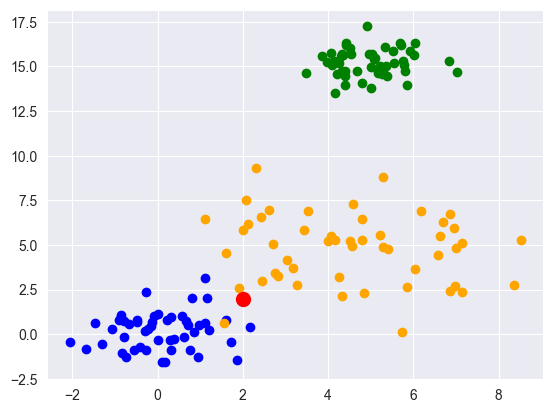

In [1]:
# для начала импортируем модули, которые понадобятся нам для написание классификатора
# numpy - библиотека для работы с массивами(матрицами в том числе), помогает делать различные операции над ними
import numpy as np
# matplotlib, seaborn понадобятся для рисования графиков, отображения изображений
from matplotlib import pyplot as plt
import seaborn as sns
from sympy.physics.units import frequency

# с помощью этой команды графики будут отображаться в текущем окне в ноутбуке под ячейкой, где написан код для отображения графика
%matplotlib inline

# Зафиксируем случайность, чтобы каждый раз получалось одно и тоже
#np.random.seed(seed=42)

p1 = np.random.normal(loc=0, scale=1, size=(50, 2))
p2 = np.random.normal(loc=5, scale=2, size=(50, 2))
# cоздаем облако точек и смещаем его на (5, -5)
p3 = np.random.normal(loc=10, scale=0.8, size=(50, 2)) - np.array([5, -5])

# координаты точек на плоскости
x = np.concatenate((p1, p2, p3))
# к какому класстеру относится каждая строчка
y = np.array([1] * 50 + [2] * 50 + [3] * 50)

point = [2, 2]

plt.scatter(p1[:, 0], p1[:, 1], color='blue')
plt.scatter(p2[:, 0], p2[:, 1], color='orange')
plt.scatter(p3[:, 0], p3[:, 1], color='green')
plt.scatter(point[0], point[1], s=100, color='red')


def euclidian_metric(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))


def manheten_metric(a, b):
    return np.abs(np.sum((a - b), axis=1))


def max_metric(a, b):
    return np.max(np.abs(a - b), axis=1)


def find_neighbours(k, y, distances):
    neighbours_data = {}
    for i in range(len(y)):
        neighbours_data[distances[i]] = y[i]
    neighbours_data = dict(sorted(neighbours_data.items()))
    neighbours_distances = list(neighbours_data.keys())[:k]
    neighbours = list(neighbours_data.values())[:k]
    return neighbours, neighbours_distances


def get_closest_classes(neighbours):
    clases_info = np.unique(neighbours, return_counts=True)
    clases = clases_info[0]
    frequency = clases_info[1]
    max_frequency = frequency.argmax()
    return [clases[i] for i in range(len(frequency)) if frequency[i] == frequency[max_frequency]]


def choose_best_class(best_classes, neighbours, neighbouring_distances):
    min_mean_dist = np.inf
    best_class = None
    neighbours_dis = []
    for c in best_classes:
        for neighbour in neighbours:
            if neighbour == c:
                neighbours_dis.append(neighbouring_distances[neighbours.index(c)])
        dist = sum(neighbours_dis) / len(neighbours_dis)
        if dist < min_mean_dist:
            min_mean_dist = dist
            best_class = c
    return best_class


def nearest_neighbours_classify(x, y, k, x_pred):
    res = np.zeros(x_pred.shape[0], dtype=y.dtype)

    print('x_pred', x_pred)
    print(x_pred.shape)

    for i in range(x_pred.shape[0]):
        distances = euclidian_metric(x, x_pred[i])  # считаем расстояния до классов
        neighbours, neighbouring_distances = find_neighbours(k, y, distances)  # находим ровно k соседей этой точки
        best_classes = get_closest_classes(neighbours)  # обнаруживаем классы, которые имеются среди соседей

        res[i] = choose_best_class(best_classes, neighbours,
                                   neighbouring_distances)  # выбираем наиболее релевантный класс по среднему расстоянию до него среди соседей
    return res




